In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [3]:
store_train= pd.read_csv('store_train.csv', sep = ',')
store_train.drop('Unnamed: 0', axis = 1).head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem
0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,5,2015-07-17,4852,519,1,1,0,0,303445,2015,7,17,4
1,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,4,2015-07-16,4427,517,1,1,0,0,324709,2015,7,16,3
2,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,3,2015-07-15,4767,550,1,1,0,0,64663,2015,7,15,2
3,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,2,2015-07-14,5042,544,1,1,0,0,704685,2015,7,14,1
4,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,1,2015-07-13,5054,553,1,1,0,0,308477,2015,7,13,0


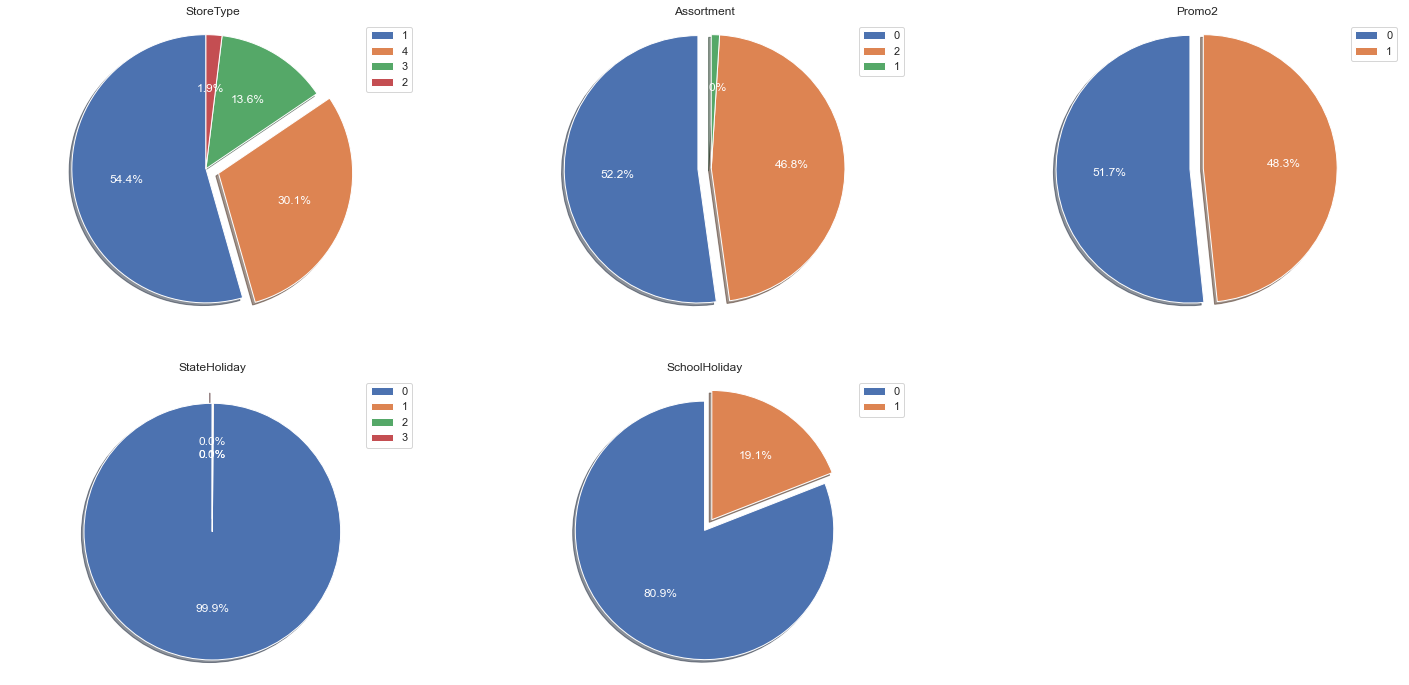

In [4]:
#Let's display the frequency of categorical variables (StoreType, Assortment, Promo, StateHoliday, SchoolHoliday) as a pie chart

sns.set(style="whitegrid");
liste_variable_quali = ['StoreType','Assortment','Promo2','StateHoliday','SchoolHoliday']

fig1, ax1 = plt.subplots(2,3,figsize=(25,12));
coordonees = [(0,0),(0,1),(0,2),(1,0),(1,1)]
explode =  [[0,0.1,0,0],[0.1,0,0],[0.1,0],[0,0,0,0.1],[0,0.1]]

for i,j,k in zip(liste_variable_quali,coordonees,explode): 
    ax1[j[0],j[1]].pie(store_train[i].value_counts(),

                       labels=store_train[i].value_counts().index.values,
                       explode = k, 
                       autopct='%1.1f%%',
                       shadow=True, 
                       startangle=90,textprops=dict(color="w"))  

    ax1[j[0],j[1]].axis('equal')
    ax1[j[0],j[1]].set_title(i)
    ax1[j[0],j[1]].legend(loc="best")   

fig1.delaxes(ax1[1, 2])
plt.show()


On remarque que StoreType contient 2 modalités majeures 1 et 4 (a et d) , qui à elles seules représentent 85% des magasins.
Les deux autres types c et b ne représentant que 15% des magasins, ils présentent peut-être des particularités comme
plus ou moins de ventes ou plus ou moins de promotions par exemple.Également il est important de noter 
qu'on a une proportion importante (48%) de promotions sur la période. Il sera intéressant d'analyser les ventes en période 
de promotion pour voir si cette stratégie Promo du magasin est payante.Sans surprise la majorité du temps il n'y a pas de 
jours fériés ou vacances scolaires. Autre point important à traiter: les variables continues. 


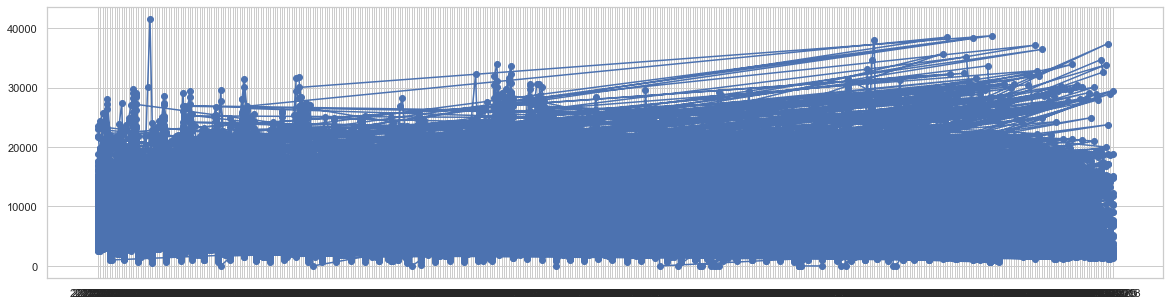

In [5]:
# Considérons la variable Sales.
plt.figure(figsize = (20,5))
plt.plot_date(x = store_train['Date'].values, y = store_train['Sales'].values, xdate = True, ls = '-');



Le graphe précédent est assez illisible pour déterminer une tendance. Les données nous offrent les ventes au temps t
pour chaque magasin. Ceci explique le grand nombre de points à chaque date. Nous allons créer un nouveau
DataFrame avec deux colonnes Date et Sales. L'objectif est de pouvoir suivre les ventes des 1115 magasins par jour.

In [38]:
sales_per_day = store_train.groupby(['Date'] , as_index = False).agg({'Sales':'sum'})
sales_per_day

,Date,Sales
0,2014-05-13,2896254
1,2014-05-14,6141038
2,2014-05-15,6252912
3,2014-05-16,6515173
4,2014-05-17,6052688
...,...,...
426,2015-07-13,10841267
427,2015-07-14,9340405
428,2015-07-15,8756137
429,2015-07-16,8373873


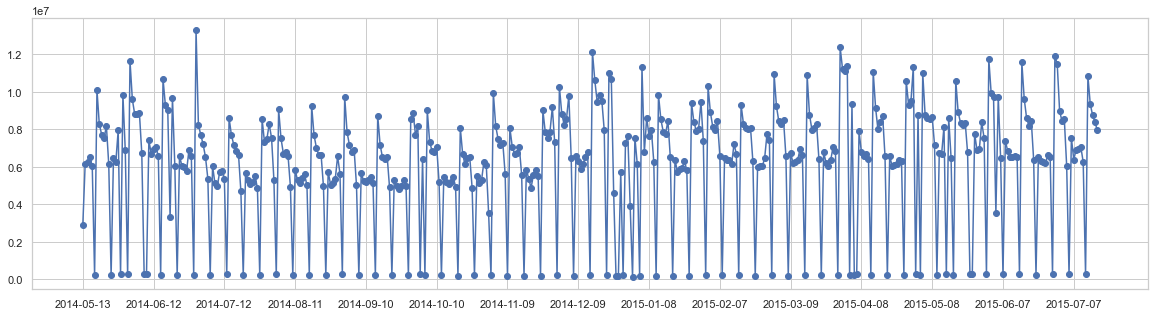

In [29]:
plt.figure(figsize = (20,5))

plt.plot_date(x = sales_per_day['Date'].values, y = sales_per_day['Sales'].values, xdate = True, ls = '-');
plt.xticks(np.arange(0,len(sales_per_day.Date), 30))
plt.show()

 On remarque des pics de ventes réguliers en milieu de semaine ce qui dénote une habitude d'achats des consommateurs. Nous y reviendrons plus tard dans l'analyse. A noter que la valeur 0 correspond aux dimanches ou jours fériés. Les données
nous offrent les ventesau temps t. Il est également intéressant de les suivre en cumulées. L'idée est de regarder si l'évolution est linéaire ou alors hachée avec des plateaux qui signifieraient un ralentissement des ventes.

In [40]:
# Nous allons créer une variable Cumulative_sales dans le dataframe sales_per_day qui calcule le revenu brut cumulé
sales_per_day['Cumulative_sales'] = sales_per_day['Sales'].cumsum()
sales_per_day.head()

,Date,Sales,Cumulative_sales
0,2014-05-13,2896254,2896254
1,2014-05-14,6141038,9037292
2,2014-05-15,6252912,15290204
3,2014-05-16,6515173,21805377
4,2014-05-17,6052688,27858065


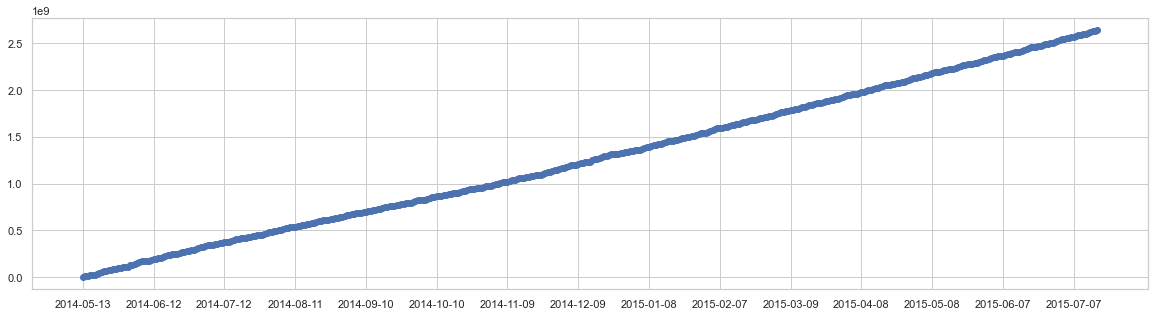

In [30]:

# Afficher l'évolution de Cumulative_sales en fonction de Date

plt.figure(figsize = (20,5))

plt.plot_date(x = sales_per_day['Date'].values, y = sales_per_day['Cumulative_sales'].values, xdate = True, ls = '-');
var_num = ['Sales','Customers']
plt.xticks(np.arange(0,len(sales_per_day.Date), 30))
plt.show()

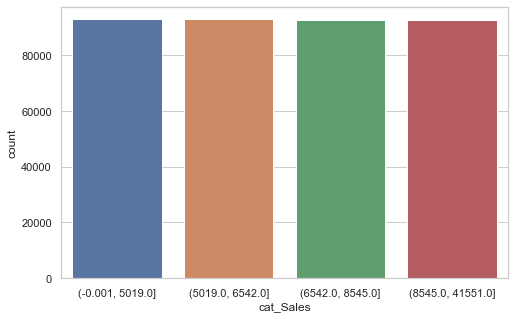

In [32]:

# Pour chacune des variables continues Sales et Customer nous allons vcréer une nouvelle variable cat_ma_var constituée de 4 modalités :
# [min,q1],[q1,q2],[q2,q3],[q3,max]

for i in var_num : 

    store_train['cat_' + i] = pd.qcut(store_train[i], q = [0, .25, .5, .75, 1.])
plt.figure(figsize = (8,5))


# affichage du nombre de vente par cat_Sales

sns.countplot(x = 'cat_Sales', data = store_train);


Le découpage effectué n'est pas forcément l'idéal : il ne permet pas déceler de tendance étant donné que chaque
catégorie contient 25% des valeurs

In [51]:
# nous allons regarder le minimum et le maximum et découper Sales en 8 intervalles réguliers


borne_inf = int(round(store_train['Sales'].min()))

borne_sup = int(round(store_train['Sales'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

store_train['cat_Sales'] = pd.cut(
    store_train['Sales'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)


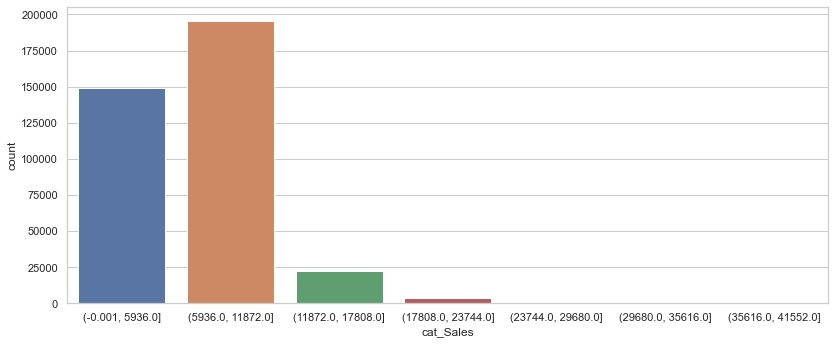

In [50]:
plt.figure(figsize=(30,12))
plt.subplot(222)

sns.countplot(x = 'cat_Sales', data = store_train);

On remarque, au contraire de l'histogramme précédent, une tendance. Les ventes les plus importantes en nombre se
situent entre 0 et 5343 et entre 5936€ et 11872€. A noter qu'on a un nombre non négligeable de ventes se situant
entre 118772 et 17808€. 

In [58]:
# même découpage

borne_inf = int(round(store_train['Customers'].min()))

borne_sup = int(round(store_train['Customers'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

store_train['cat_Customers'] = pd.cut(store_train['Customers'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)

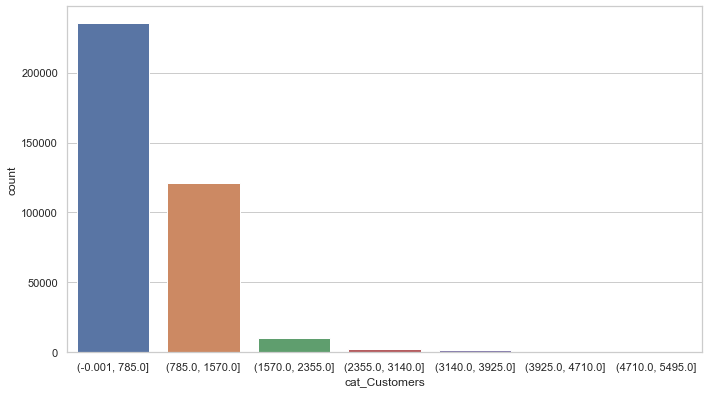

In [57]:
plt.figure(figsize=(25,14))
plt.subplot(221)

sns.countplot(x = 'cat_Customers', data = store_train);

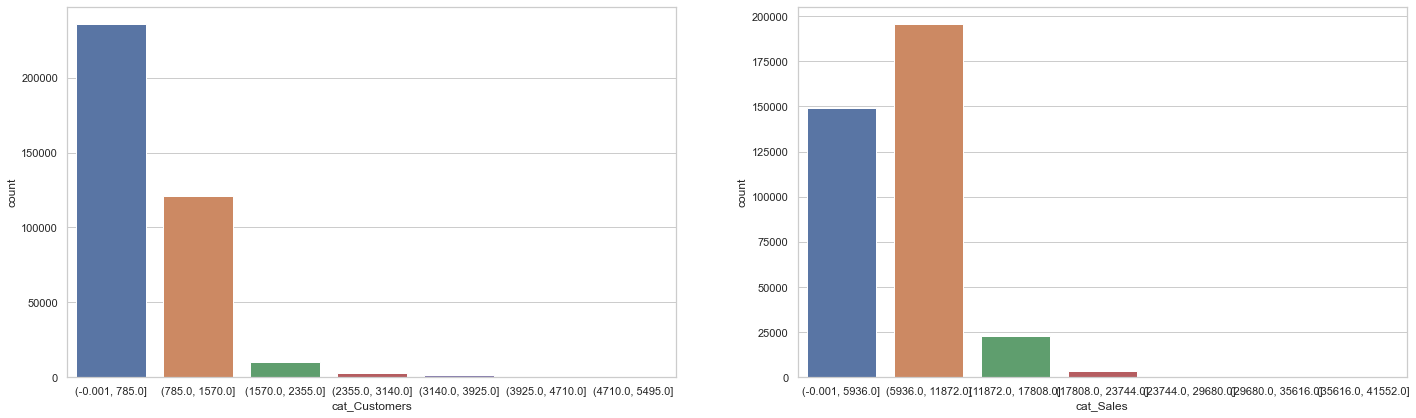

In [37]:
# Affichons le nombre d'individu des 2 catégories nouvellement créées dans un même graphique

plt.figure(figsize=(24,15))

plt.subplot(221)

sns.countplot(x = 'cat_Customers', data = store_train);

plt.subplot(222)

sns.countplot(x = 'cat_Sales', data = store_train);
